labels_dict {1: '511144', 2: '518576', 3: '459495', 4: '490704', 5: '523522', 6: '522691', 7: '495494', 8: '491515', 9: '506122', 10: '489367', 11: '521825', 12: '555555', 13: '20240403', 14: '444444', 15: '524271', 16: '123456'}
Epoch 1/50


/Users/simranbirkaur/Python_Miniconda/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 964ms/step - accuracy: 0.0126 - loss: 3.1574 - val_accuracy: 0.0385 - val_loss: 2.7752
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 820ms/step - accuracy: 0.0654 - loss: 2.7539 - val_accuracy: 0.0385 - val_loss: 2.7965
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 871ms/step - accuracy: 0.0878 - loss: 2.6775 - val_accuracy: 0.0385 - val_loss: 2.7480
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 922ms/step - accuracy: 0.2231 - loss: 2.5354 - val_accuracy: 0.1154 - val_loss: 2.7703
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 867ms/step - accuracy: 0.3703 - loss: 2.0380 - val_accuracy: 0.5385 - val_loss: 2.0141
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 863ms/step - accuracy: 0.7909 - loss: 1.0446 - val_accuracy: 0.6923 - val_loss: 0.9454
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 858ms/step - accuracy: 0.8264 - loss: 0.5798 - val_accuracy: 0.8077 - val_loss: 0.6027
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 909ms/step - accuracy: 0.9175 - loss: 0.3044 - val_accuracy: 0.8077 - val_loss: 0.6220
Ep

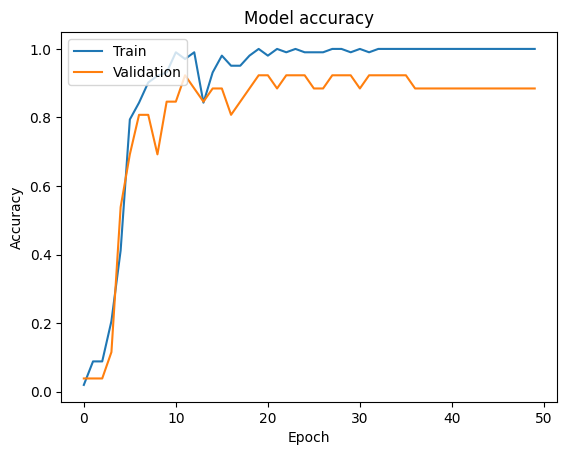

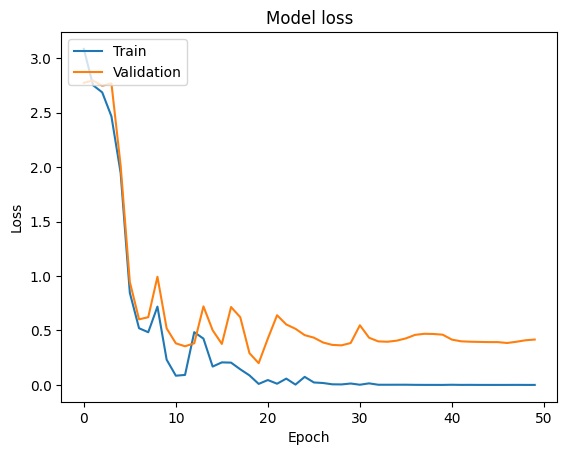

AttributeError: 'FaceRecognitionCNN' object has no attribute 'predict'

In [2]:
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

class FaceRecognitionCNN:
    def __init__(self, images_folder):
        self.images_folder = images_folder
        self.labels_dict = {}
        self.model = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.num_classes = None

    def _load_images_and_labels(self):
        images = []
        labels = []
        label = 0
        for root, dirs, files in os.walk(self.images_folder):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    image_path = os.path.join(root, file)
                    img = cv2.imread(image_path)
                    img = cv2.resize(img, (250, 250))  # Resize image to 250x250
                    images.append(img)
                    labels.append(os.path.basename(root))  # Label is the folder name
            self.labels_dict[label] = os.path.basename(root)
            label += 1
        self.labels_dict.pop(0, None)
        print("labels_dict",self.labels_dict)
        return images, labels
    
    def _preprocess_data(self, images, labels):
        le = LabelEncoder()
        labels_encoded = le.fit_transform(labels)
        self.num_classes = len(le.classes_)
        images = np.array(images)
        labels_encoded = to_categorical(labels_encoded, self.num_classes)  # Convert labels to one-hot encoding       
        return images, labels_encoded
    
    def build_model(self):
        self.model = Sequential([
            tf.keras.layers.Rescaling(1./255), # Normalizing pixel values
            Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(64, (2, 2), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.2),
            Dense(self.num_classes, activation='softmax')
        ]) 
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    """def build_model(self):
        self.model = Sequential([
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.1),
            tf.keras.layers.RandomZoom(0.1),
            tf.keras.layers.Rescaling(1./255), # Normalizaing pixel values
            Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(64, (2, 2), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.2),
            Dense(self.num_classes, activation='softmax')
        ]) 
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])"""

    def train(self, test_size=0.2, epochs=50, batch_size=10):

        print("Training faces. It will take a few seconds. Please wait ...")

        images, labels = self._load_images_and_labels()
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            images, labels, test_size=test_size, random_state=42, stratify=labels)
        self.X_train, self.y_train = self._preprocess_data(self.X_train, self.y_train)
        self.X_test, self.y_test = self._preprocess_data(self.X_test, self.y_test)
        self.build_model()
        history = self.model.fit(self.X_train, self.y_train, validation_split=0.2, shuffle=True, epochs=epochs, batch_size=20, verbose=1)
        self.plot_training_history(history)
        return history

    def plot_training_history(self, history):
        # Plot training & validation accuracy values
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

        # Plot training & validation loss values
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
    

    def test_model(self):
        y_pred_prob = model.predict(self.X_test)
        y_pred = np.argmax(y_pred_prob, axis=1)
        y_true = np.argmax(self.y_test, axis=1)
        confidence_scores = np.max(y_pred_prob, axis=1)
        print.info("Confidence Scores: %s", confidence_scores)
        accuracy = accuracy_score(y_true, y_pred)
        print.info("Test Accuracy: %s", accuracy)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"R^2 Score: {r2:.4f}")
        print("=" * 50)
    
        print("Classification Report:")
        print(classification_report(y_true, y_pred, target_names=self.labels_dict.values()))

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=self.labels_dict.values(), yticklabels=self.labels_dict.values())
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

# Example usage:
model = FaceRecognitionCNN(images_folder='/Users/simranbirkaur/Desktop/capstone_final/Face-Recognition-Based-Attendance-System/dataset/images')
history = model.train()
model.test_model()

